## import library yang digunakan

In [1]:
import pandas as pd
import csv
import string 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df_disini = pd.read_csv('hasil labeling data.csv')
df_disini.head()

,username,tanggal,tweet,sentimen
0,pkmjangkar,3/7/2022 23:58,update jadwal vaksinasi covid 19 upt puskesmas...,positif
1,CNNIndonesia,3/7/2022 23:57,syarat jalan polymerase chain reaction antigen...,netral
2,DindaNatasha15,3/7/2022 23:56,perintah pasti vaksin covid 19 bukti aman uji ...,positif
3,juvejack,3/7/2022 23:49,menko maritim investasi luhut pandjaitan tanga...,netral
4,nengsunshine,3/7/2022 23:47,ok google negatif covid vaksin,netral


In [3]:
df_disini[['tweet']]

,tweet
0,update jadwal vaksinasi covid 19 upt puskesmas...
1,syarat jalan polymerase chain reaction antigen...
2,perintah pasti vaksin covid 19 bukti aman uji ...
3,menko maritim investasi luhut pandjaitan tanga...
4,ok google negatif covid vaksin
...,...
1047,vaksin uji aman khasiat sehat cegah tingkat pa...
1048,vaksin covid 19 protokol sehat ikhtiar
1049,waspada info berita palsu berita bohong fakta ...
1050,simpul narasi bawah orang vaksin mati saji buk...


In [4]:
cv = CountVectorizer()
term_fit = cv.fit(df_disini['tweet'])

print (len(term_fit.vocabulary_))

3337


print (term_fit.vocabulary_) #mengurutkan berdasarkan urutab abjad kata 

print (term_fit.get_feature_names()) #mengurutkan berdasarkan urutkan nama 

In [5]:
term_frequency_all = term_fit.transform(df_disini['tweet'])
#print (term_frequency_all)

In [6]:
tweet_tf = df_disini['tweet'][2] #memanggil tweet kolom yg diinginkan
print (tweet_tf)

perintah pasti vaksin covid 19 bukti aman uji patuh disiplin protokol sehat


In [7]:
term_frequency = term_fit.transform([tweet_tf]) #hanya menampilkan tweet kolom yg diinginkan
print (term_frequency)

  (0, 56)	1
  (0, 267)	1
  (0, 611)	1
  (0, 704)	1
  (0, 822)	1
  (0, 2242)	1
  (0, 2249)	1
  (0, 2292)	1
  (0, 2416)	1
  (0, 2684)	1
  (0, 3150)	1
  (0, 3201)	1


In [8]:
dokumen = term_fit.transform(df_disini['tweet']) #hasil perhitungan tf idf yg diinginkan
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf)

[5.39444915 6.3499606  6.3499606  ... 7.26625133 7.26625133 7.26625133]
  (0, 3201)	0.08564761877333006
  (0, 3150)	0.35389213547338505
  (0, 2684)	0.21780105199854236
  (0, 2416)	0.25523639464570663
  (0, 2292)	0.3085496221565277
  (0, 2249)	0.3886438435077786
  (0, 2242)	0.4192183493889173
  (0, 822)	0.2826449042532804
  (0, 704)	0.08387353216369516
  (0, 611)	0.39235756482522327
  (0, 267)	0.27981038358438814
  (0, 56)	0.11700331113327385


## CountVectorizer

In [9]:
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(df_disini['tweet'])
bow.shape

(1052, 3337)

## membagi data train dan testing

In [10]:
#df_disini=df_disini.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df_disini['sentimen'],
                                                    test_size=0.2,random_state=0)

In [11]:
#print("X_train_shape : ",X_train.shape)
#print("X_test_shape : ",X_test.shape)
print("train_shape : ",y_train.shape)
print("test_shape : ",y_test.shape)

train_shape :  (841,)
test_shape :  (211,)


## naive bayes classifier

In [12]:
from sklearn.naive_bayes import MultinomialNB

NBC= MultinomialNB().fit(X_train, y_train) 
uji_nbc= NBC.predict(X_test)
akurasi_nbc = accuracy_score(uji_nbc, y_test)
print("hasil akurasi nbs: ",akurasi_nbc)

hasil akurasi nbs:  0.7345971563981043


In [13]:
confusion_matrix(y_test, uji_nbc)

array([[ 16,   9,   2],
       [ 10, 101,  20],
       [  1,  14,  38]], dtype=int64)

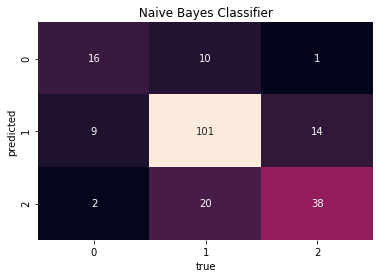

In [14]:
#plt.figure(dpi=100)
matrix = confusion_matrix(y_test, uji_nbc)
sns.heatmap(matrix.T, annot=True, fmt='d', cbar=False)

plt.title(' Naive Bayes Classifier ')
plt.xlabel('true')
plt.ylabel('predicted')
plt.show()

In [15]:
akurasi_nbc = accuracy_score(uji_nbc, y_test)
print("hasil akurasi nbs: ",akurasi_nbc)

hasil akurasi nbs:  0.7345971563981043


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,uji_nbc))

              precision    recall  f1-score   support

     negatif       0.59      0.59      0.59        27
      netral       0.81      0.77      0.79       131
     positif       0.63      0.72      0.67        53

    accuracy                           0.73       211
   macro avg       0.68      0.69      0.69       211
weighted avg       0.74      0.73      0.74       211



## suport vector machine

In [17]:
from sklearn.svm import SVC

SVM = SVC(kernel='linear').fit(X_train, y_train) 
uji_svm = SVM.predict(X_test)

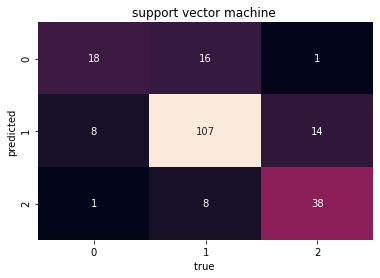

In [18]:
matrix = confusion_matrix(y_test, uji_svm)
sns.heatmap(matrix.T, annot=True, fmt='d', cbar=False)

plt.title('support vector machine ')
plt.xlabel('true ')
plt.ylabel('predicted')
plt.show()

In [19]:
akurasi_svm = accuracy_score(uji_svm, y_test)
print("hasil akurasi svm: ",akurasi_svm)

hasil akurasi svm:  0.7725118483412322


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, uji_svm))

              precision    recall  f1-score   support

     negatif       0.51      0.67      0.58        27
      netral       0.83      0.82      0.82       131
     positif       0.81      0.72      0.76        53

    accuracy                           0.77       211
   macro avg       0.72      0.73      0.72       211
weighted avg       0.78      0.77      0.78       211



## KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train) 
uji_knn = KNN.predict(X_test)

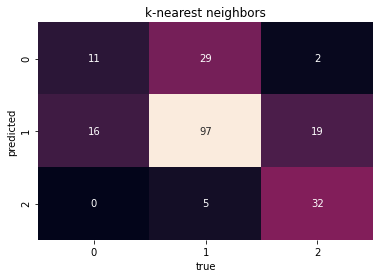

In [22]:
matrix = confusion_matrix(y_test, uji_knn)
sns.heatmap(matrix.T, annot=True, fmt='d', cbar=False)

plt.title('k-nearest neighbors')
plt.xlabel('true')
plt.ylabel('predicted')
plt.show()


In [23]:
akurasi_knn = accuracy_score(uji_knn, y_test)
print("hasil akurasi k-nn: ",akurasi_knn)

hasil akurasi k-nn:  0.6635071090047393


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, uji_knn))

              precision    recall  f1-score   support

     negatif       0.26      0.41      0.32        27
      netral       0.73      0.74      0.74       131
     positif       0.86      0.60      0.71        53

    accuracy                           0.66       211
   macro avg       0.62      0.58      0.59       211
weighted avg       0.71      0.66      0.68       211

